In [205]:
#import Libraries

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import time
%matplotlib inline

# 1- GATHERING DATA

In [156]:
# Reading Enhanced Archive and store it into dataframe.
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [157]:
# READING IMAGE PREDICTION FILE VIA requests and store it into dataframe.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = requests.get(url)

with open ("image-predictions.tsv" , 'wb') as outfile:
    outfile.write(image_pred.content)

df_image = pd.read_csv('image-predictions.tsv' , sep='\t')

In [158]:
# Reading json file and store it into dataframe

df_api = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet-json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_api = df_api.reset_index(drop=True)

# 2- ASSESSING DATA

## i) Twitter Archive Enhanced Dataframe

In [56]:
#1 Visual Assessment
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [57]:
df_arc.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [58]:
# Checking for duplication in tweet_Id column
df_arc.tweet_id.duplicated().sum()

0

In [59]:
# reviewing expanded_url content
df_arc.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [60]:
# Diplaying name column to review content. This also being reviewed manually in excel
df_arc['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Buddy           7
Toby            7
an              7
Daisy           7
Scout           6
Milo            6
Bella           6
Jack            6
Oscar           6
Stanley         6
Leo             6
Dave            6
Koda            6
Rusty           6
Jax             6
Sunny           5
             ... 
Beemo           1
Zooey           1
Mona            1
Chuck           1
Rufio           1
Sailer          1
General         1
Miguel          1
Horace          1
Lolo            1
Dante           1
Jockson         1
Glacier         1
Brandonald      1
Bradlay         1
Pluto           1
Emma            1
Ralphus         1
Ivar            1
Staniel         1
Tyrus           1
Zeus            1
Darla           1
Todo            1
Fillup    

In [61]:
# Checking null values in Expanded_urls
df_arc.expanded_urls.isnull().sum()

59

In [62]:
#Reviewing if all numerator > 0
df_arc['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [63]:
#Checking if all denominator are 10
df_arc['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

### Quality
- 1) __Timestamp__ type is string not datetime. 
- 2) __rating_denominator__ values != 10 (some 0 values and max value of 170).
- 3) __rating_numerator__ values > 20 (24 entries with values very high) & not float.
- 4) __Tweet_id__ type in intiger not string object.
- 5) __name__ - 745 entries with non values, name with lower case (ie,not correct name).
- 6) Drop in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id  , retweeted_status_user_id  ,retweeted_status_timestamp, source.


### Tidiness
- 1) Doggo, floofer , pupper, puppo columns all describe same variable : Dog Style.
- 2) Different columns(variables) in different table with common twitter_id


### ii) Image Prediction DataFrame

In [64]:
# Review dataset strucure and entries
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [65]:
# Review column type and number of entries
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality
- 7) Tweet ID type in intiger not string object
- 8) Drop image_num

### iii) Twitter API DataFrame


In [66]:
 # Review dataset strucure and entries
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [67]:
# Review column type and number of entries
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [68]:
# Review any duplicate tweet_id
df_api.duplicated('tweet_id').sum()

0

In [69]:
# Review retweet_count maximum and minimum value for any outliers
df_api.retweet_count.max()

79515

In [70]:
# Review retweet_count maximum and minimum value for any outliers
df_api.retweet_count.min()

0

In [71]:
# Review favourite_count maximum and minimum value for any outliers
df_api.favorite_count.min()

0

In [72]:
# Review favourite_count maximum and minimum value for any outliers
df_api.favorite_count.max()

132810

## Quality
- 9) retweet_count & favourite_count type in string not intiger


# 3- CLEANING DATA

In [159]:
# Create copy dataframes to used in cleaning process

df_arc_clean = df_arc.copy()
df_image_clean = df_image.copy()
df_api_clean = df_api.copy()

## Quality

In [195]:
#Define : 1) Convert timestamp type to datetime

# Code:
df_arc_clean['timestamp'] = pd.to_datetime (df_arc_clean['timestamp'])

# Test
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                  

In [75]:
#Define : 2) Assign all deniminator rating to 10

# Code:
df_arc_clean['rating_denominator'] = 10

# Test
df_arc_clean['rating_denominator'].describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [76]:
#Define : 3) Extract numerator rating from text column & Convert type to float

# Code:
df_arc_clean['rating_numerator'] = df_arc_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

df_arc_clean['rating_numerator']=df_arc_clean['rating_numerator'].astype(float)

# Test
df_arc_clean[(df_arc_clean['rating_numerator'] >20)].count()

tweet_id                      20
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     20
source                        20
text                          20
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 16
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

In [77]:
# During testing it is observed 20 entries with high values above 20. Drop the rows

# Code:
df_arc_clean = df_arc_clean[(df_arc_clean['rating_numerator'] <=20)]

# Test
df_arc_clean[(df_arc_clean['rating_numerator'] >20)].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [167]:
# Define: 4) & 7) Convert tweet_id to string

# Code:
df_arc_clean['tweet_id']   = df_arc_clean['tweet_id'].astype(str) 
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)
df_api_clean['tweet_id'] = df_api_clean['tweet_id'].astype(str)

# Test 
print(df_arc_clean['tweet_id'].dtype)
print(df_image_clean['tweet_id'].dtype)
print(df_api_clean['tweet_id'].dtype)

object
object
object


In [79]:
# Define: 5) Replace wrong dogname (lower case letters names) 

# Code:
mask = df_arc_clean.name.str.islower()
column_name = 'name'
df_arc_clean.loc[mask, column_name] = np.nan

# test
df_arc_clean[(df_arc_clean.name.str.islower()==True)].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [80]:
# Define: 6) Drop columns [''in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source'] 

# Code:
df_arc_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source'], axis=1, inplace=True)


# Test:

df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2336 non-null object
timestamp             2336 non-null datetime64[ns]
text                  2336 non-null object
expanded_urls         2281 non-null object
rating_numerator      2336 non-null float64
rating_denominator    2336 non-null int64
name                  2229 non-null object
doggo                 2336 non-null object
floofer               2336 non-null object
pupper                2336 non-null object
puppo                 2336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 219.0+ KB


In [81]:
# Define :  8) Drop image_non column

# Code: 
df_image_clean.drop('img_num', axis=1, inplace = True)

# Test:

df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


In [166]:
# Define: 9) Convert retweet count and favourite count to type integer

# Code:

df_api_clean['retweet_count'] = df_api_clean['retweet_count'].astype(int)
df_api_clean['favorite_count'] = df_api_clean['favorite_count'].astype(int)

# Test:

df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Tidiness

In [220]:
# Define: 1)Combine Dogstyle into 1 new column "stage". If more than 1 entry in stage,ie multiple satges, both satge are maintained
          # Replace Non with NaN


# Code:

#Replace Non in column with NaN
df_arc_clean['doggo'].replace('None','',inplace=True)
df_arc_clean['floofer'].replace('None','',inplace=True)
df_arc_clean['pupper'].replace('None','',inplace=True)
df_arc_clean['puppo'].replace('None','',inplace=True)

# Combine stages into 1 new stage column
df_arc_clean['stage'] = df_arc_clean.doggo + df_arc_clean.floofer + df_arc_clean.pupper + df_arc_clean.puppo

# Maintain multiple stages:
df_arc_clean.loc[df_arc_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_arc_clean.loc[df_arc_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_arc_clean.loc[df_arc_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


# convert the datatype from string to categorical
df_arc_clean.stage = df_arc_clean.stage.astype('category')

# Drop doggo,floofer,pupper,puppo columns

df_arc_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

# Test

df_arc_clean.groupby('stage').count()
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 242.0+ KB


## MERGE & SAVE

In [233]:
print(df_arc_clean['tweet_id'].dtype)
print(df_image_clean['tweet_id'].dtype)
print(df_api_clean['tweet_id'].dtype)

object
object
object


In [234]:
# Define: 2)Combine Ddataframes into 1 master dataframe

#Code:
# Create temp dataframe for archive and api merge
df_temp_clean = pd.merge(df_arc_clean, df_api_clean, on='tweet_id', how='inner')
# Create master dataframe through merge of temp and image dataframe
df_master_clean = pd.merge(df_temp_clean, df_image_clean, on='tweet_id', how='inner')

# Test: 
df_master_clean.info()

# Store master dataframe into csv file
df_master_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
stage                         2073 non-null category
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
jpg_url                       2073 non-null object
img_num                   

In [242]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
stage                         2073 non-null category
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
jpg_url                       2073 non-null object
img_num                   

In [97]:
df_master_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# 4- ANALYZING DATA

### Insight & Visualize 1

In [186]:
# Analyze most rated dogs breed
df_master_clean['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

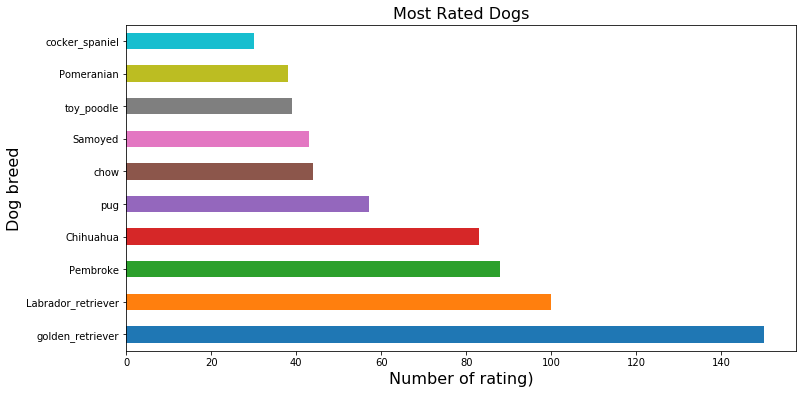

In [185]:
# Plot most rated dogs breed

plt.figure(figsize=[12, 6])

df_master_clean['p1'].value_counts().head(10).plot(kind='barh')

plt.title('Most Rated Dogs' , fontsize = 16)
plt.xlabel('Number of rating)', fontsize = 16)
plt.ylabel('Dog breed', fontsize = 16)
plt.show()

### Insight & Visualize 2

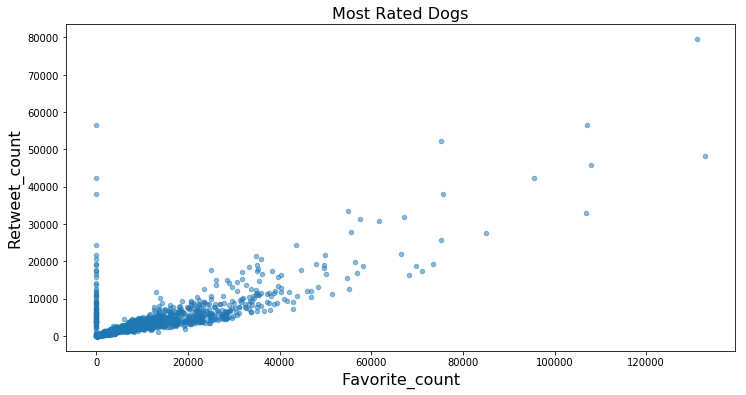

In [229]:
# Review relation between favorite tweet count and retweet count

df_master_clean.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5, figsize = (12,6))

plt.title('Most Rated Dogs' , fontsize = 16)
plt.xlabel('Favorite_count', fontsize = 16)
plt.ylabel('Retweet_count', fontsize = 16)
plt.show()


### Insight & Visualize 3

In [219]:
# Analyse tweet count trend over time duration month and year
df_arc_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    302
2015-12    388
2016-01    194
2016-02    125
2016-03    137
2016-04     60
2016-05     60
2016-06     97
2016-07    105
2016-08     75
2016-09     84
2016-10     88
2016-11     88
2016-12     70
2017-01     94
2017-02     88
2017-03     68
2017-04     60
2017-05     56
2017-06     59
2017-07     56
2017-08      2
Name: timestamp, dtype: int64

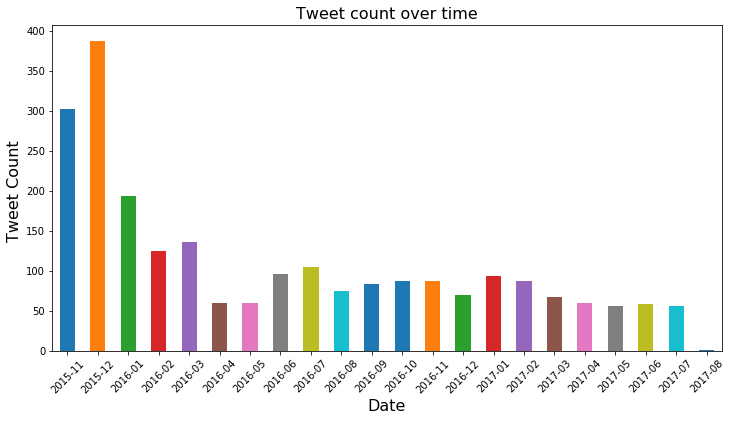

In [241]:
# Visualize the analysis of tweet count trend over time
plt.figure(figsize=[12, 6])

df_arc_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index().plot(kind='bar')

plt.title('Tweet count over time' , fontsize = 16)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Tweet Count ', fontsize = 16)
plt.xticks(rotation=45)
plt.show()

### Insight & Visualize 4

In [ ]:
#Analyse dog style to see propotion of most populate dogctionary  pupper, doggo,puppo,floofer

In [203]:
df_master_clean[df_master_clean['stage']!='']['stage'].value_counts()

pupper           210
doggo             67
puppo             23
doggo,pupper      11
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

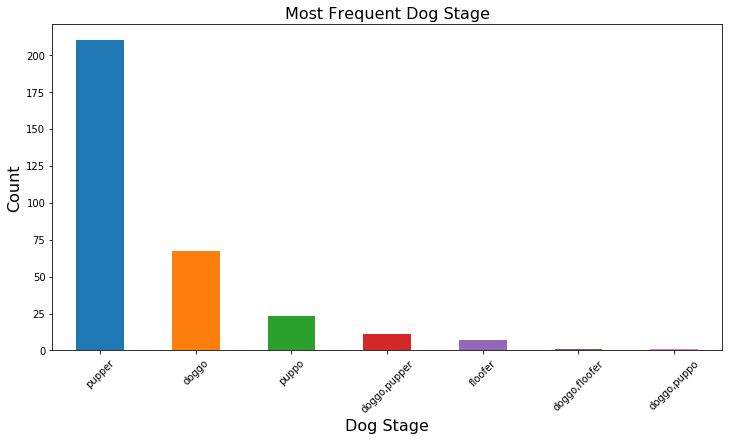

In [183]:
plt.figure(figsize=[12, 6])

df_master_clean[df_master_clean['stage']!='']['stage'].value_counts().plot(kind='bar')

plt.title('Most Frequent Dog Stage' , fontsize = 16)
plt.xlabel('Dog Stage', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation=45)

plt.show()